In [120]:
!pip install pandas

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [122]:
df = pd.read_csv(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\SC.csv", sep=';', encoding='latin1')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,"0,0805",ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,"0,0929",ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,"0,1171",ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,"0,165",ppm,Automatica,Referencia


In [123]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia


In [124]:
df.dtypes

Ano           int64
Mes           int64
Dia           int64
Hora          int64
Minuto        int64
Estacao      object
Codigo       object
Poluente     object
Valor       float64
Unidade      object
Tipo         object
Testacao     object
dtype: object

In [125]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
df

,Ano,Mes,Dia,Hora,Minuto,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Testacao
0,2023,1,1,0,30,Capivari de Baixo,SC_002,PTS,20.0,ug/m3,Automatica,Referencia
1,2023,1,1,1,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
2,2023,1,1,2,30,Capivari de Baixo,SC_002,PTS,21.0,ug/m3,Automatica,Referencia
3,2023,1,1,3,30,Capivari de Baixo,SC_002,PTS,16.0,ug/m3,Automatica,Referencia
4,2023,1,1,4,30,Capivari de Baixo,SC_002,PTS,17.0,ug/m3,Automatica,Referencia
...,...,...,...,...,...,...,...,...,...,...,...,...
201475,2023,12,31,19,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201476,2023,12,31,20,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201477,2023,12,31,21,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia
201478,2023,12,31,22,30,Vila Moema,SC_001,CO,NaN,ppm,Automatica,Referencia


In [126]:
# Filtrar dados apenas da estação SC_002 e poluentes que vou analisar

filtred_SC_002_df = df.loc[
(df['Codigo'] == 'SC_002') &
(df['Poluente'].isin(['MP10', 'PTS', 'SO2', 'NO2']))]

filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)

filtred_SC_002_df = filtred_SC_002_df.set_index('Date')

filtred_SC_002_df = filtred_SC_002_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto','Poluente','Valor', 'Unidade']]
filtred_SC_002_df

C:\Users\najuw\AppData\Local\Temp\ipykernel_7220\1266841597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_SC_002_df.loc[:, 'Date'] = df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1)


,Ano,Mes,Dia,Hora,Minuto,Poluente,Valor,Unidade
Date,,,,,,,,
2023-01-01 00:30:00,2023,1,1,0,30,PTS,20.0,ug/m3
2023-01-01 01:30:00,2023,1,1,1,30,PTS,17.0,ug/m3
2023-01-01 02:30:00,2023,1,1,2,30,PTS,21.0,ug/m3
2023-01-01 03:30:00,2023,1,1,3,30,PTS,16.0,ug/m3
2023-01-01 04:30:00,2023,1,1,4,30,PTS,17.0,ug/m3
...,...,...,...,...,...,...,...,...
2023-12-31 19:30:00,2023,12,31,19,30,NO2,NaN,ug/m3
2023-12-31 20:30:00,2023,12,31,20,30,NO2,NaN,ug/m3
2023-12-31 21:30:00,2023,12,31,21,30,NO2,NaN,ug/m3


In [127]:
print(filtred_SC_002_df['Poluente'].unique())

['PTS' 'SO2' 'MP10' 'NO2']


In [128]:
df_PTS = filtred_SC_002_df.query('Poluente =="PTS"')
df_SO2 = filtred_SC_002_df.query('Poluente =="SO2"')
df_MP10 = filtred_SC_002_df.query('Poluente == "MP10"')
df_NO2 = filtred_SC_002_df.query('Poluente == "NO2"')

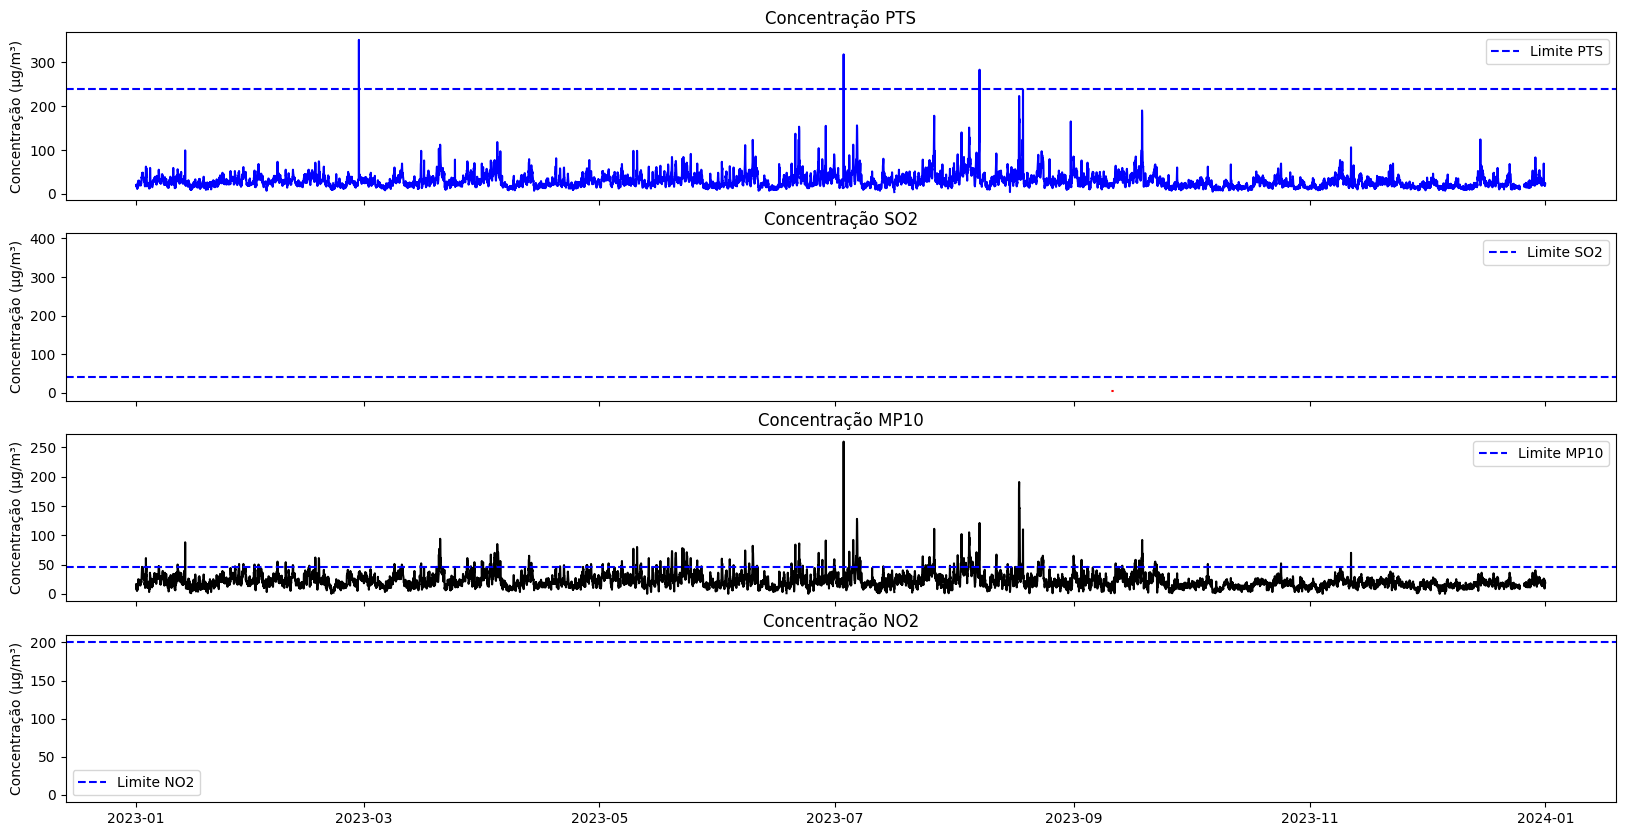

In [129]:
data = [
    (df_PTS, 'Concentração PTS', 'Concentração (µg/m³)', 240, 'blue'),
    (df_SO2, 'Concentração SO2', 'Concentração (µg/m³)', 40, 'red'),
    (df_MP10, 'Concentração MP10', 'Concentração (µg/m³)', 45, 'black'),
    (df_NO2, 'Concentração NO2', 'Concentração (µg/m³)', 200, 'green')
]

# Criando subplots
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

# Loop para plotar cada gráfico
for i, (df, title, ylabel, limite, color) in enumerate(data):
    ax[i].plot(df.index, df['Valor'], color=color)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title)
    ax[i].set_ylabel(ylabel)
    ax[i].legend()


plt.show()

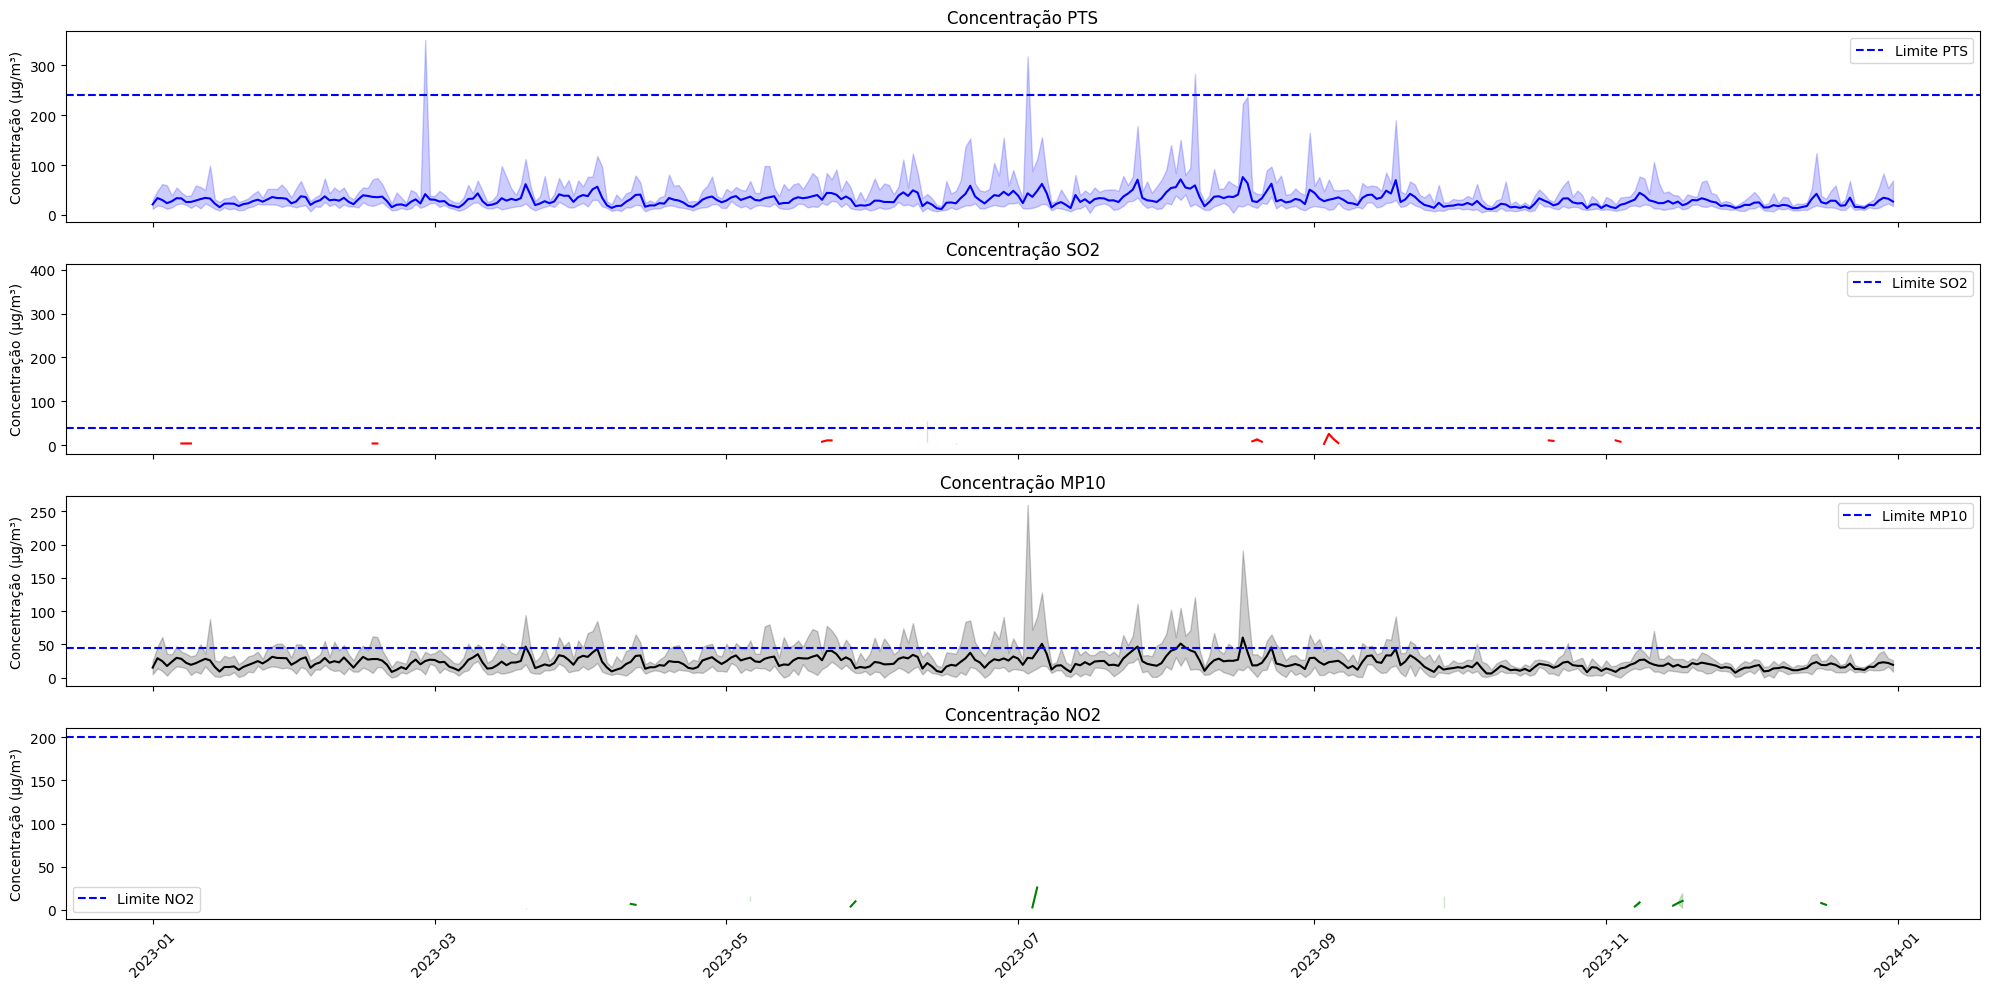

In [130]:
# Lista de poluentes

poluentes = {
    "PTS": ('blue', 240, 'µg/m³'),
    "SO2": ('red', 40, 'µg/m³'),
    "MP10": ('black', 45, 'µg/m³'),
    "NO2": ('green', 200, 'µg/m³')
}


# Criando subplots
fig, ax = plt.subplots(len(poluentes), 1, sharex=True, figsize=(20, 10))

# Plotando os dados em loop
for i, (poluente, (color, limite, unidade)) in enumerate(poluentes.items()):
    dff = filtred_SC_002_df.query(f'Poluente == "{poluente}"')

    # Agregando dados
    media_diaria = dff['Valor'].resample('D').mean()
    min_diaria = dff['Valor'].resample('D').min()
    max_diaria = dff['Valor'].resample('D').max()

    ax[i].plot(media_diaria.index, media_diaria, color=color)
    ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=color, alpha=0.2)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {poluente}')

    ax[i].set_title(f'Concentração {poluente}')
    ax[i].set_ylabel(f'Concentração ({unidade})')
    ax[i].legend()

# Ajustando o eixo
ax[-1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [131]:
print(df.head())

                      Ano  Mes  Dia  Hora  Minuto Poluente  Valor Unidade
Date                                                                     
2023-01-01 00:30:00  2023    1    1     0      30      NO2    NaN   ug/m3
2023-01-01 01:30:00  2023    1    1     1      30      NO2    NaN   ug/m3
2023-01-01 02:30:00  2023    1    1     2      30      NO2    NaN   ug/m3
2023-01-01 03:30:00  2023    1    1     3      30      NO2    NaN   ug/m3
2023-01-01 04:30:00  2023    1    1     4      30      NO2    NaN   ug/m3


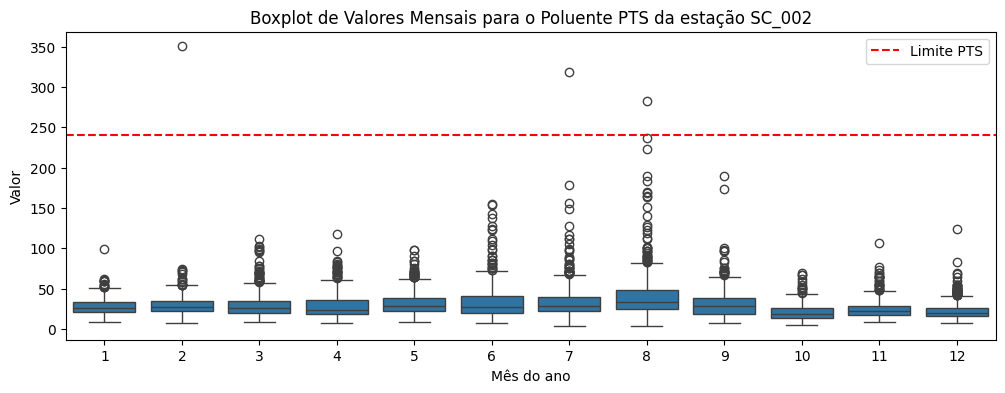

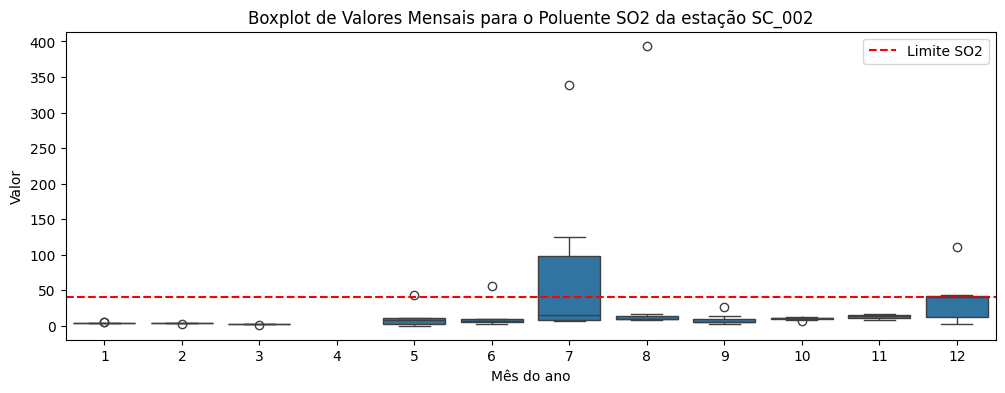

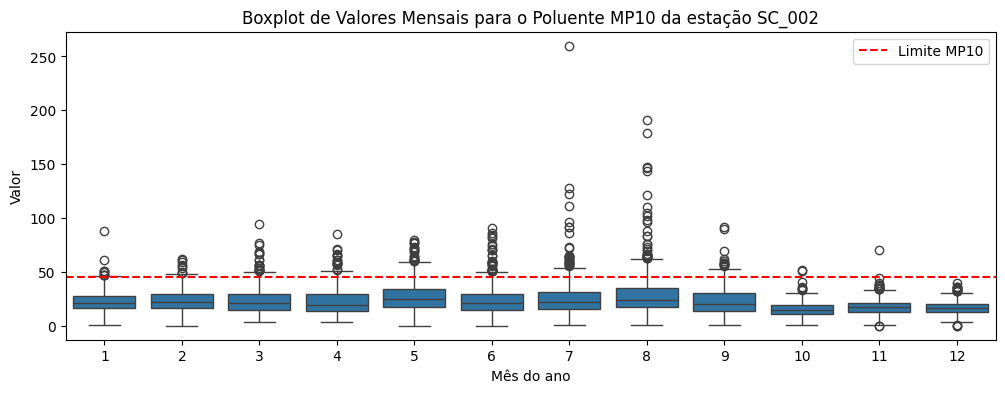

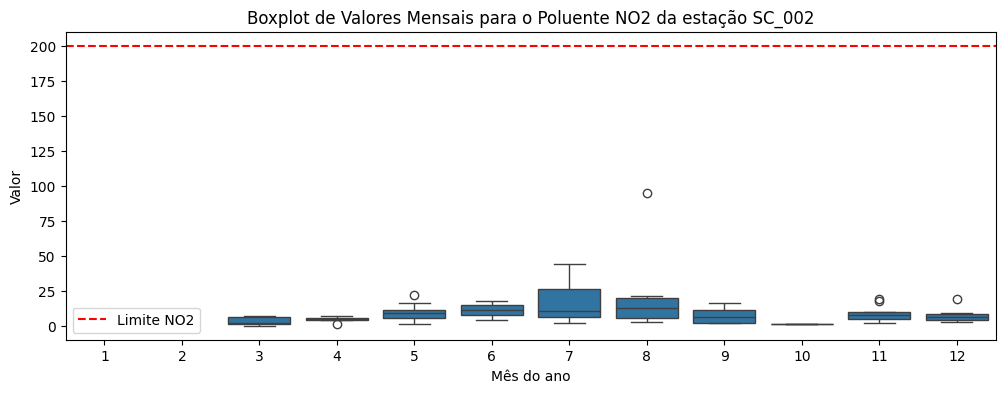

In [136]:
# Gerando gráfico boxplot

def plot_boxplot(data, poluente, limite_legislacao):
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Mes', y='Valor', data=data, ax=ax)
    
    # Adicionando linha tracejada
    ax.axhline(y=limite_legislacao, color='red', linestyle='--', label=f'Limite {poluente}')
    
    plt.xlabel('Mês do ano')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores Mensais para o Poluente {poluente} da estação SC_002')
    plt.legend()  
    plt.show()

# Adicionando os limites da CONAMA 
limites_legislacao = {
    'PTS': 240,   
    'SO2': 40,   
    'MP10': 45,  
    'NO2': 200    
}

# Chamando a função para cada DataFrame
plot_boxplot(df_PTS, 'PTS', limites_legislacao['PTS'])
plot_boxplot(df_SO2, 'SO2', limites_legislacao['SO2'])
plot_boxplot(df_MP10, 'MP10', limites_legislacao['MP10'])
plot_boxplot(df_NO2, 'NO2', limites_legislacao['NO2'])


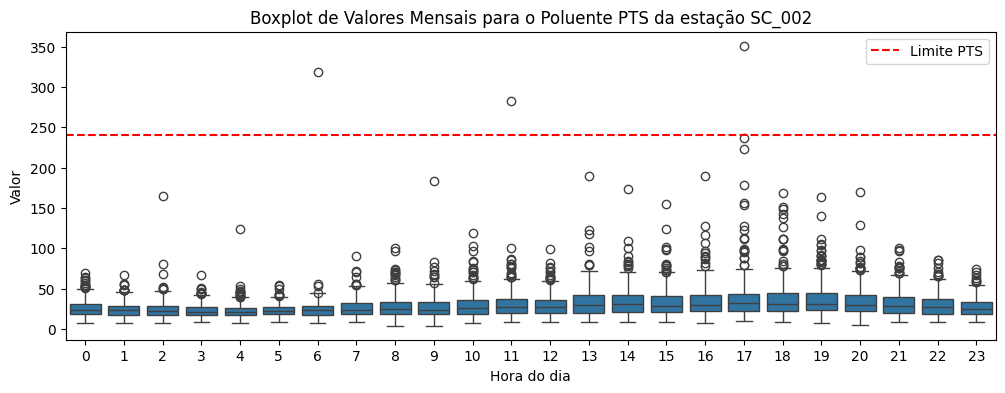

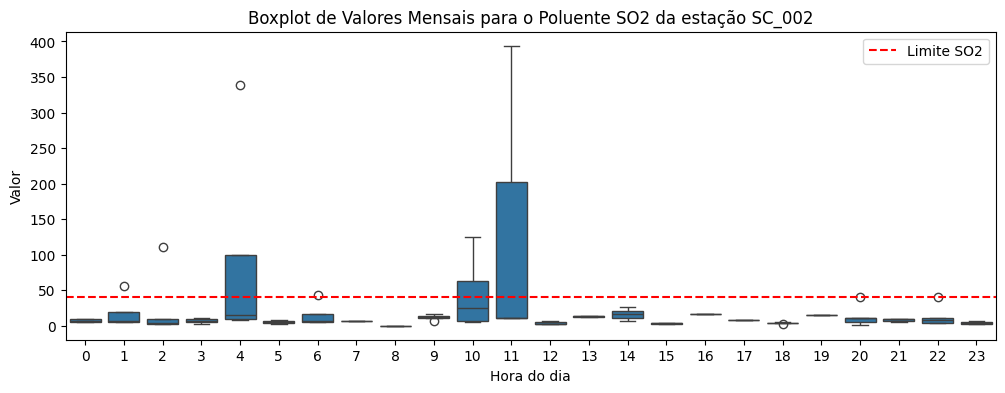

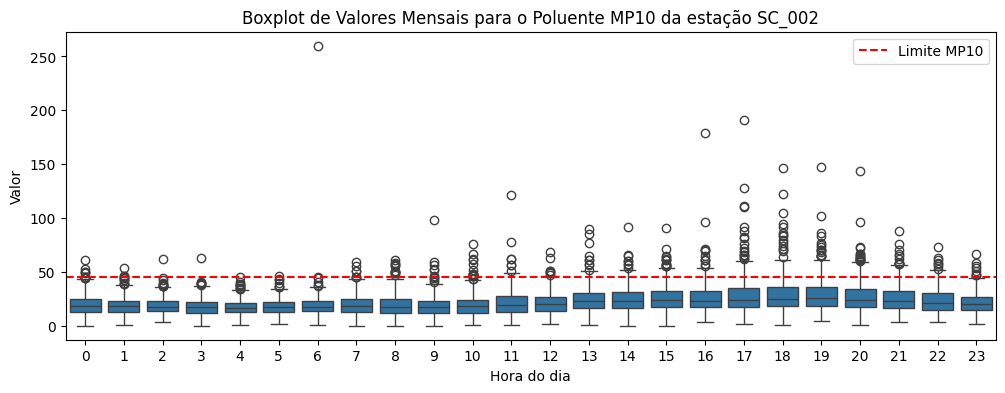

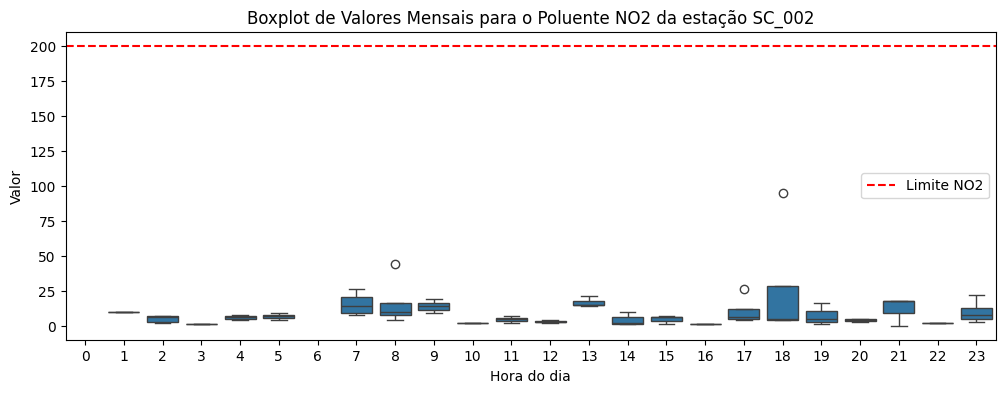

In [135]:
# Gerando gráfico boxplot

def plot_boxplot(data, poluente, limite_legislacao):
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Hora', y='Valor', data=data, ax=ax)
    
    # Adicionando linha tracejada
    ax.axhline(y=limite_legislacao, color='red', linestyle='--', label=f'Limite {poluente}')
    
    plt.xlabel('Hora do dia')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores Mensais para o Poluente {poluente} da estação SC_002')
    plt.legend()  
    plt.show()

# Adicionando os limites da CONAMA 
limites_legislacao = {
    'PTS': 240,   
    'SO2': 40,   
    'MP10': 45,  
    'NO2': 200    
}

# Chamando a função para cada DataFrame
plot_boxplot(df_PTS, 'PTS', limites_legislacao['PTS'])
plot_boxplot(df_SO2, 'SO2', limites_legislacao['SO2'])
plot_boxplot(df_MP10, 'MP10', limites_legislacao['MP10'])
plot_boxplot(df_NO2, 'NO2', limites_legislacao['NO2'])

C:\Users\najuw\AppData\Local\Temp\ipykernel_7220\2194597189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Estacao'] = data['Mes'].map(estacoes)


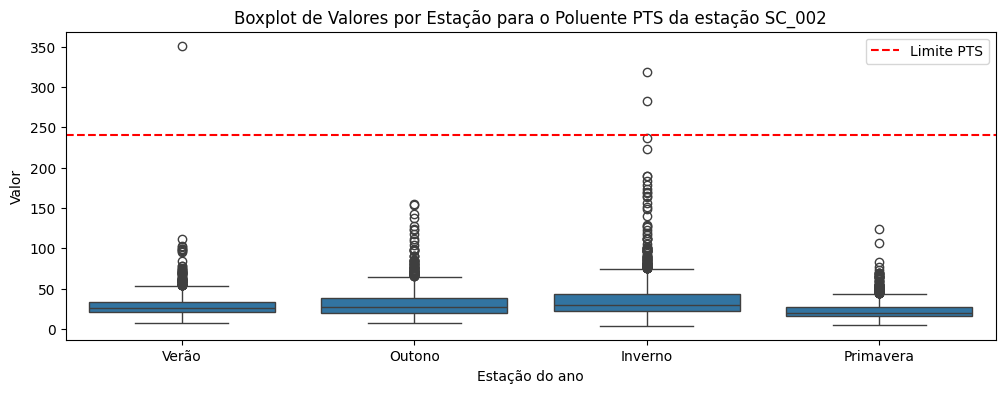

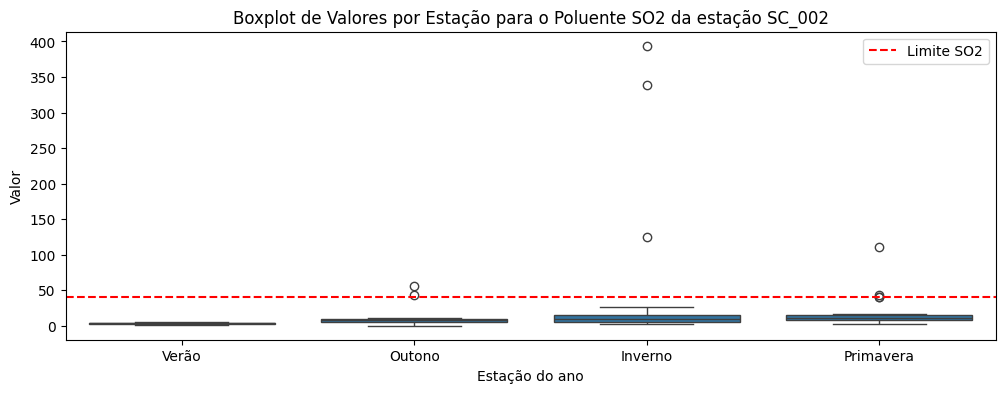

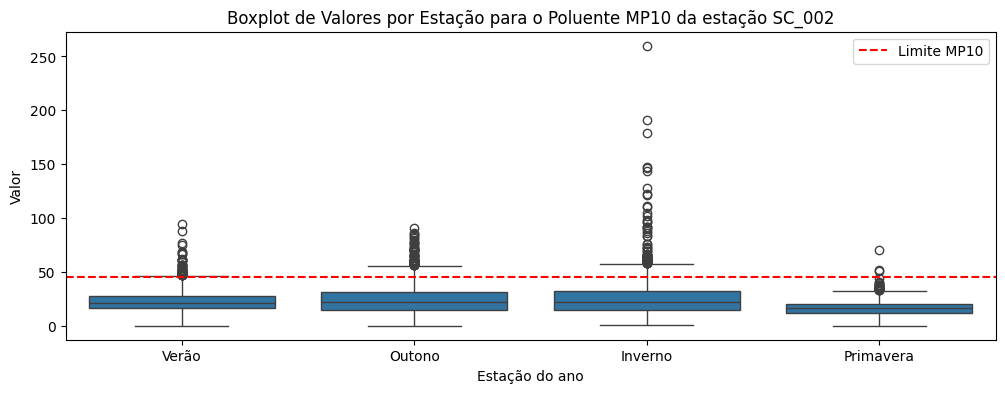

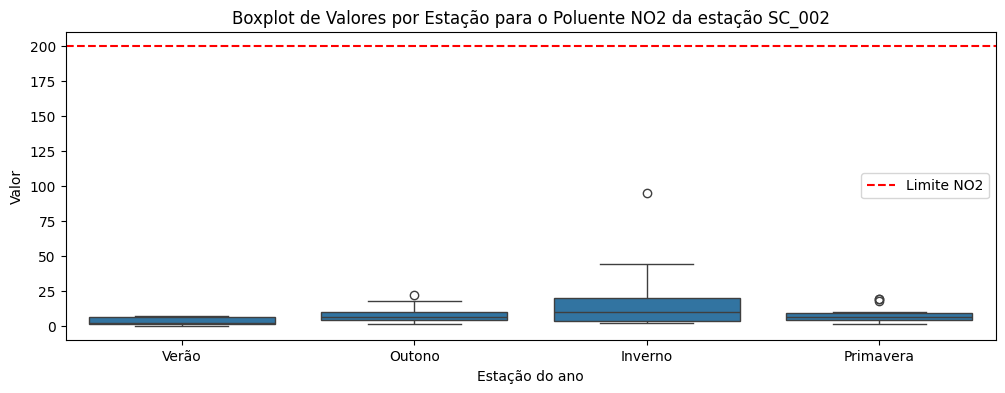

In [138]:
# Determinando e adicionando as estações

def adicionar_estacoes(data):
    estacoes = {
        1: 'Verão', 2: 'Verão', 3: 'Verão',
        4: 'Outono', 5: 'Outono', 6: 'Outono',
        7: 'Inverno', 8: 'Inverno', 9: 'Inverno',
        10: 'Primavera', 11: 'Primavera', 12: 'Primavera'
    }
    data['Estacao'] = data['Mes'].map(estacoes)
    return data


# Atualizando os DataFrames

df_PTS = adicionar_estacoes(df_PTS)
df_SO2 = adicionar_estacoes(df_SO2)
df_MP10 = adicionar_estacoes(df_MP10)
df_NO2 = adicionar_estacoes(df_NO2)


# Gerando gráfico boxplot

def plot_boxplot(data, poluente, limite_legislacao):
    fig, ax = plt.subplots()
    fig.set_size_inches((12, 4))
    sns.boxplot(x='Estacao', y='Valor', data=data, ax=ax)
    
    # Adicionando linha tracejada
    ax.axhline(y=limite_legislacao, color='red', linestyle='--', label=f'Limite {poluente}')
    
    plt.xlabel('Estação do ano')
    plt.ylabel('Valor')
    plt.title(f'Boxplot de Valores por Estação para o Poluente {poluente} da estação SC_002')
    plt.legend()  
    plt.show()


plot_boxplot(df_PTS, 'PTS', limites_legislacao['PTS'])
plot_boxplot(df_SO2, 'SO2', limites_legislacao['SO2'])
plot_boxplot(df_MP10, 'MP10', limites_legislacao['MP10'])
plot_boxplot(df_NO2, 'NO2', limites_legislacao['NO2'])


In [133]:
# Função para descrever a coluna 'Valor' de cada poluente
def descrever_valor(data, poluente):
    print(f'Estatísticas Descritivas para o Poluente {poluente} (coluna "Valor"):')
    print(data['Valor'].describe())

# Chamando a função para cada DataFrame
descrever_valor(df_PTS, 'PTS')
descrever_valor(df_SO2, 'SO2')
descrever_valor(df_MP10, 'MP10')
descrever_valor(df_NO2, 'NO2')


Estatísticas Descritivas para o Poluente PTS (coluna "Valor"):
count    8720.000000
mean       29.447821
std        16.945012
min         4.000000
25%        19.000000
50%        26.000000
75%        35.000000
max       351.000000
Name: Valor, dtype: float64
Estatísticas Descritivas para o Poluente SO2 (coluna "Valor"):
count     76.000000
mean      22.184211
std       60.651949
min        0.000000
25%        4.000000
50%        7.500000
75%       11.000000
max      394.000000
Name: Valor, dtype: float64
Estatísticas Descritivas para o Poluente MP10 (coluna "Valor"):
count    8711.000000
mean       22.229480
std        12.757134
min         0.000000
25%        14.000000
50%        20.000000
75%        27.000000
max       260.000000
Name: Valor, dtype: float64
Estatísticas Descritivas para o Poluente NO2 (coluna "Valor"):
count    62.000000
mean      9.887097
std      13.507866
min       0.000000
25%       3.250000
50%       6.500000
75%      10.000000
max      95.000000
Name: Valor, dt

In [134]:
# Função describe para estatísticas univariadas

def descrever_valor(data, poluente):
    print(f'Estatísticas Descritivas para o Poluente {poluente} (µg/m³):')
    estatisticas = data['Valor'].describe()
    
    # Formatando a saída para apenas 2 casas decimais
    for indice, valor in estatisticas.items():
        print(f"{indice}: {valor:.2f}")
    print('\n')  # Linha em branco para melhor visualização

descrever_valor(df_PTS, 'PTS')
descrever_valor(df_SO2, 'SO2')
descrever_valor(df_MP10, 'MP10')
descrever_valor(df_NO2, 'NO2')


Estatísticas Descritivas para o Poluente PTS (µg/m³):
count: 8720.00
mean: 29.45
std: 16.95
min: 4.00
25%: 19.00
50%: 26.00
75%: 35.00
max: 351.00


Estatísticas Descritivas para o Poluente SO2 (µg/m³):
count: 76.00
mean: 22.18
std: 60.65
min: 0.00
25%: 4.00
50%: 7.50
75%: 11.00
max: 394.00


Estatísticas Descritivas para o Poluente MP10 (µg/m³):
count: 8711.00
mean: 22.23
std: 12.76
min: 0.00
25%: 14.00
50%: 20.00
75%: 27.00
max: 260.00


Estatísticas Descritivas para o Poluente NO2 (µg/m³):
count: 62.00
mean: 9.89
std: 13.51
min: 0.00
25%: 3.25
50%: 6.50
75%: 10.00
max: 95.00


